<a href="https://colab.research.google.com/github/JonathanJuradoS/Clustering_K-means/blob/main/kmeans_ciberseguridad_CASO_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lisis con K-Means ‚Äì Kmeans Ciberseguridad

**Contexto:** Una empresa desea identificar comportamientos inusuales en su tr√°fico de red sin tener etiquetas, mediante agrupamiento de caracter√≠sticas como duraci√≥n, puertos y bytes transferidos.

**Objetivo:** Aplicar K-Means para detectar patrones an√≥malos en eventos de red como posible se√±al de ataque o acceso sospechoso.

## Paso 1: Importar librer√≠as necesarias
**Descripci√≥n:** Se importan las librer√≠as que se utilizar√°n para manipular datos, crear el modelo K-Means, escalar variables, reducir dimensiones y graficar.

**Conclusi√≥n:** Con estas herramientas se puede realizar un an√°lisis completo de clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Paso 2: Cargar el dataset
**Descripci√≥n:** Se carga el archivo CSV y se visualizan las primeras filas para conocer la estructura del dataset.

**Conclusi√≥n:** Se identifican las variables que ser√°n utilizadas para el an√°lisis de clustering.

In [2]:
df = pd.read_csv('ciberseguridad_eventos.csv')
df.head()

evento_id        ip_origen      ip_destino  \
0  7e933580-35ba-471e-8ee1-5b4ece35e572      144.97.67.7    34.112.24.55   
1  17dce8cd-666a-47b1-a6f4-3fb3d9aa0cc0   204.130.106.41   187.20.47.187   
2  68b54c9e-e944-4137-8d4e-c67ff0f9074e  139.145.230.200    216.1.62.166   
3  6b96298c-68ef-4ff8-8d95-88dadee74fd6    63.129.129.67  10.232.119.187   
4  a95a0984-4a32-4fc9-ab9d-03c617de5ad4    92.87.137.241  109.115.133.70   

   puerto  duracion_segundos  bytes_transferidos      hora  
0    8080                 47              897928  20:08:37  
1    8080                152              305893  01:39:03  
2    8080                 93               51195  06:30:40  
3     443                 61              878953  02:23:07  
4      80                 13              766064  18:44:41

## Paso 3: Seleccionar variables num√©ricas y escalar los datos
**Descripci√≥n:** Se seleccionan las columnas num√©ricas y se estandarizan para que todas tengan igual peso en la distancia.

**Conclusi√≥n:** Se garantiza que ninguna variable domine el c√°lculo de distancias debido a su escala.

In [3]:
data = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

## Paso 4: M√©todo del Codo para determinar el n√∫mero √≥ptimo de clusters
**Descripci√≥n:** Se calcula la inercia para distintos valores de K y se grafica para identificar el punto de quiebre ('codo').

**Conclusi√≥n:** El punto donde la curva deja de descender abruptamente sugiere el n√∫mero √≥ptimo de clusters.

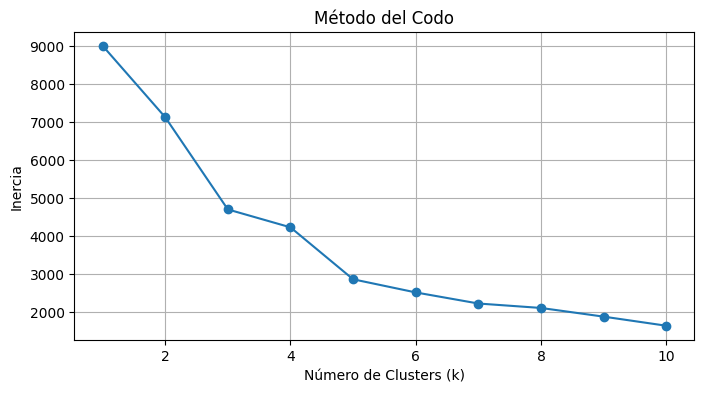

In [4]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('M√©todo del Codo')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

## Paso 5: Aplicar K-Means con K √≥ptimo
**Descripci√≥n:** Se ejecuta el algoritmo K-Means con el n√∫mero de clusters elegido.

**Conclusi√≥n:** Cada punto queda asignado a uno de los clusters creados.

In [5]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)
df['cluster'] = kmeans.labels_

## Paso 6: Visualizaci√≥n de clusters (2D con Pairplot)
**Descripci√≥n:** Se visualizan las relaciones entre variables coloreando por cluster.

**Conclusi√≥n:** Se observa si los clusters tienen separaci√≥n visual clara en 2D.

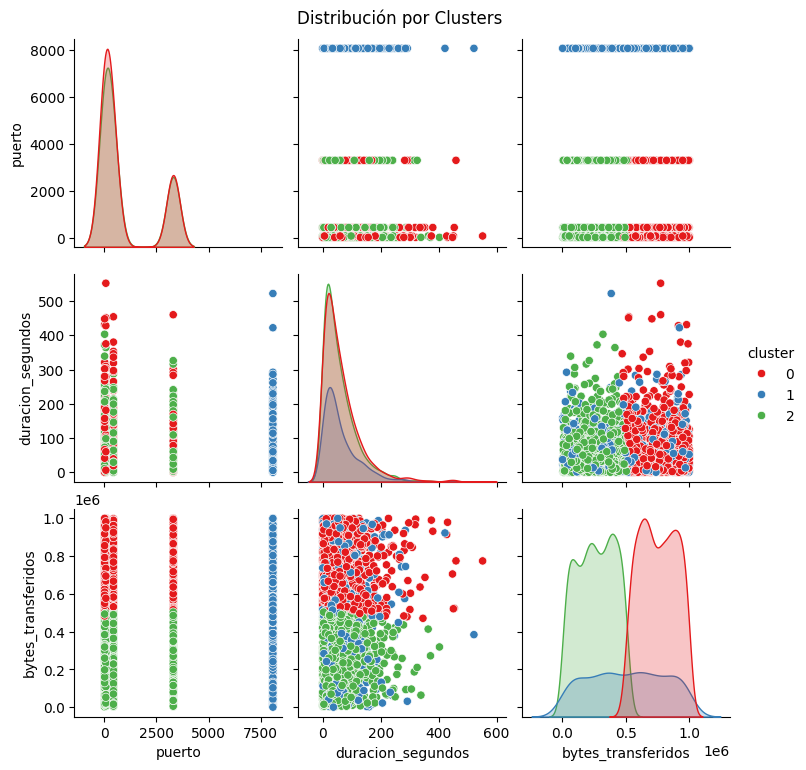

In [6]:
sns.pairplot(df, hue='cluster', palette='Set1')
plt.suptitle('Distribuci√≥n por Clusters', y=1.02)
plt.show()

## Paso 7: Silhouette Score y gr√°fico de silueta
**Descripci√≥n:** Se calcula el coeficiente de silueta global y por punto para evaluar la calidad de los clusters.

**Conclusi√≥n:** Valores cercanos a 1 indican buena asignaci√≥n. Se visualiza la cohesi√≥n interna de cada grupo.

Silhouette Score: 0.3519


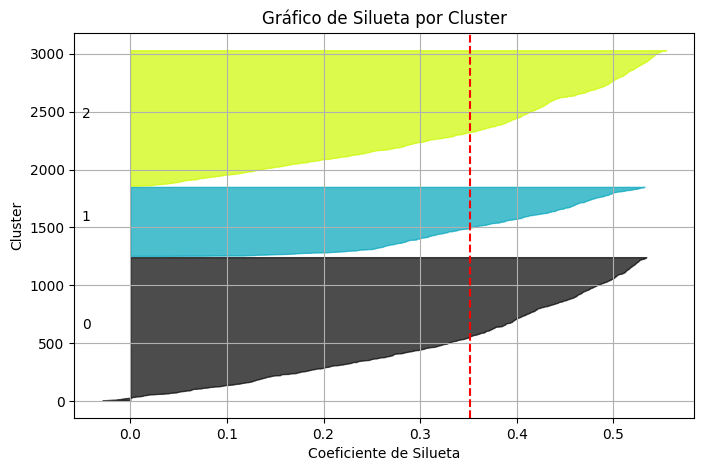

In [7]:
score = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.4f}")

sample_silhouette_values = silhouette_samples(data_scaled, kmeans.labels_)
y_lower = 10
fig, ax1 = plt.subplots(figsize=(8, 5))

for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title('Gr√°fico de Silueta por Cluster')
ax1.set_xlabel('Coeficiente de Silueta')
ax1.set_ylabel('Cluster')
ax1.axvline(x=score, color="red", linestyle="--")
plt.grid(True)
plt.show()

üìê Silhouette Score = 0.3519
üìå ¬øQu√© significa?
El Silhouette Score mide qu√© tan bien se agrupan los puntos dentro de sus clusters y qu√© tan separados est√°n de otros clusters. Sus valores posibles est√°n entre -1 y 1.

üîç Tu resultado de 0.3519 cae dentro del rango "aceptable/moderado", lo que implica que:

Hay cierta estructura en los datos que permite la agrupaci√≥n.

Los clusters tienen cohesi√≥n interna razonable, aunque no perfecta.

Puede existir algo de solapamiento o puntos mal asignados, pero el modelo es √∫til y v√°lido.

‚úÖ Conclusi√≥n del an√°lisis:
El agrupamiento K-Means que obtuviste es moderadamente s√≥lido.

Puede ser suficiente para prop√≥sitos exploratorios o de segmentaci√≥n preliminar en ciberseguridad.

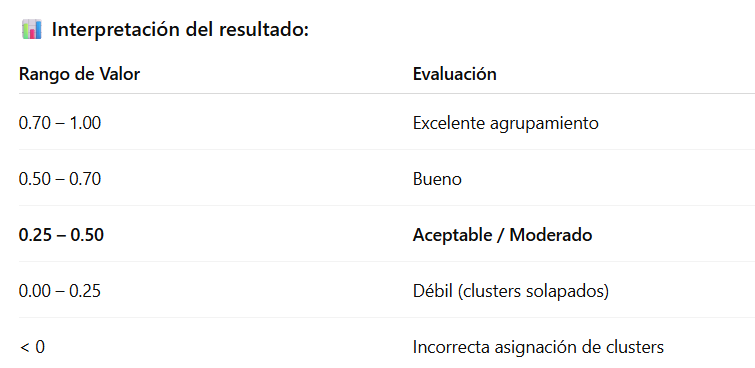

## Paso 8: M√©tricas Davies-Bouldin y Calinski-Harabasz
**Descripci√≥n:** M√©tricas complementarias que eval√∫an la compacidad y separaci√≥n entre clusters.

**Conclusi√≥n:** Se usan para confirmar la calidad del agrupamiento.

In [8]:
db_score = davies_bouldin_score(data_scaled, kmeans.labels_)
ch_score = calinski_harabasz_score(data_scaled, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

Davies-Bouldin Score: 1.1081
Calinski-Harabasz Score: 1373.54


üìä 1. Davies-Bouldin Score = 1.1081
üìå ¬øQu√© mide?
Eval√∫a la similitud entre clusters, considerando qu√© tan dispersos son y qu√© tan cerca est√°n entre ellos.

üéØ Interpretaci√≥n:
M√°s bajo es mejor.

Idealmente, valores < 1.0 indican grupos bien separados y compactos.

Tu valor 1.1081 es bastante aceptable y se considera razonablemente bueno, especialmente para datos reales donde los clusters no son perfectamente separados.

‚úÖ Conclusi√≥n:
El modelo logra una buena separaci√≥n, aunque no perfecta, y se considera v√°lido para detecci√≥n de patrones an√≥malos.

üìà 2. Calinski-Harabasz Score = 1373.54
üìå ¬øQu√© mide?
Es una raz√≥n entre dispersi√≥n inter-cluster y dispersi√≥n intra-cluster.

Mientras m√°s alto, mejor diferenciados est√°n los grupos.

üéØ Interpretaci√≥n:
Tu valor 1373.54 es muy bueno.

Indica que los clusters est√°n:

Bien separados entre s√≠.

Relativamente compactos internamente.

## Paso 9: Visualizaci√≥n 2D con PCA
**Descripci√≥n:** Se reduce la dimensionalidad a 2 componentes principales para graficar los clusters y sus centroides.

**Conclusi√≥n:** Una separaci√≥n clara refuerza la efectividad del modelo.

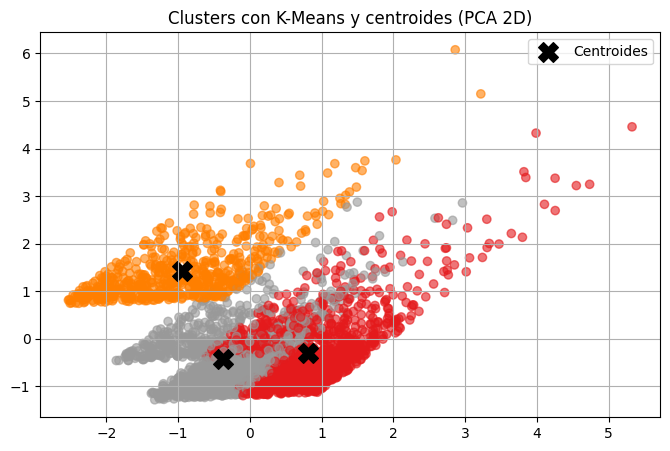

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)
centroids_2d = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='Set1', alpha=0.6)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', s=200, c='black', label='Centroides')
plt.title("Clusters con K-Means y centroides (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()

## Paso 10: Visualizaci√≥n 3D
**Descripci√≥n:** Se muestra una representaci√≥n tridimensional de los clusters si existen al menos 3 variables num√©ricas.

**Conclusi√≥n:** Permite observar patrones m√°s complejos entre los grupos.

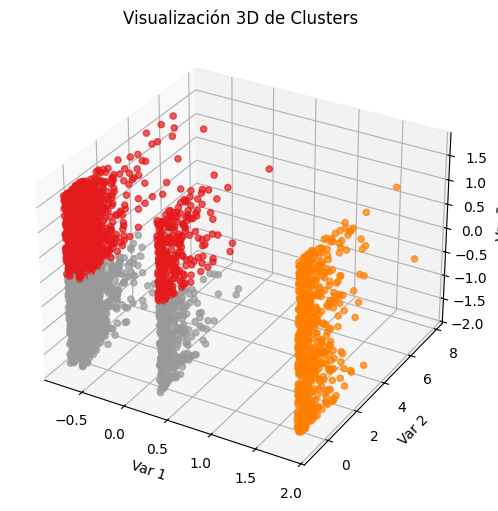

In [10]:
if data_scaled.shape[1] >= 3:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2],
                         c=kmeans.labels_, cmap='Set1', alpha=0.7)
    ax.set_title("Visualizaci√≥n 3D de Clusters")
    ax.set_xlabel("Var 1")
    ax.set_ylabel("Var 2")
    ax.set_zlabel("Var 3")
    plt.show()
else:
    print("No hay suficientes variables num√©ricas para graficar en 3D.")

## ‚úÖ Conclusiones Finales del An√°lisis con K-Means

- K-Means permite segmentar los datos de manera efectiva sin necesidad de etiquetas.
- Las m√©tricas (Inercia, Silhouette, Davies-Bouldin, Calinski-Harabasz) ayudan a validar el n√∫mero y calidad de clusters.
- Las visualizaciones 2D y 3D permiten una interpretaci√≥n intuitiva de los grupos formados.
- Este tipo de an√°lisis es aplicable en marketing, ciberseguridad, log√≠stica, entre otros.